In [25]:
import urllib
link = "https://community.smartthings.com/t/public-calendar-for-smartthings-developer-events/10209"
file= urllib.request.urlopen(link)
data = file.read()
import re
import requests
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import time
import pickle
url = "https://community.smartthings.com/t/public-calendar-for-smartthings-developer-events/10209"
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
#options = webdriver.ChromeOptions()
#driver = webdriver.Chrome(executable_path = './chromedriver', options = options)
#driver.get(url)
#page = driver.execute_script('return document.body.innerHTML')
#soup = BeautifulSoup(''.join(page),'html.parser')

In [26]:
print(soup)

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<title>Public calendar for SmartThings developer events - Groups &amp; Events - SmartThings Community</title>
<meta content="Dear community, 

In 2015, we&amp;#39;re going to do a better job of event planning. If you want to keep up with which events are sponsoring and participating in, add this Google Calendar to your account: 




Google Calendar 


&amp;hellip;" name="description"/>
<meta content="Discourse 2.5.0.beta5 - https://github.com/discourse/discourse version c8370b9c78df1161aa3db2699bbd53c3e04b9925" name="generator"/>
<link href="https://aws1.discourse-cdn.com/smartthings/optimized/3X/7/1/716336ba8239a791818b9d1c5b2ef237659d45a3_2_32x32.png" rel="icon" type="image/png"/>
<link href="https://aws1.discourse-cdn.com/smartthings/optimized/3X/6/0/60303ee32d0ca0a0624ac0b757ea61a67d895f34_2_180x180.png" rel="apple-touch-icon" type="image/png"/>
<meta content="#ededf5" name="theme-color"/>
<meta content="width=devi

In [27]:
containers = soup.findAll("div", {"class":"topic-body crawler-post"})

In [28]:
len(containers)

14

In [29]:
#orig_container = soup.find("div", {"class":"topic-body clearfix highlighted"})

In [30]:
def remove_html(text):
    sup = BeautifulSoup(text,'lxml')
    html_free = sup.get_text()
    return html_free

def remove_punc(text):
    no_punc = "".join([c for c in text if c not in string.punctuation])
    return no_punc

In [31]:
import pandas as pd
df = pd.DataFrame(columns=['User', 'Content'])

In [32]:
count = 0
for container in containers:
    
    user_container = container.findAll("span", {"itemprop":"name"})
    user = user_container[0].text
    print("User: " + user.lower())
    
    content_container = container.findAll("div", {"class":"post"})
    content = remove_html(content_container[0].text)
    print("Content: ")
    
    dfcontent = (content.lower()).replace("\t","").replace("\n"," ").replace("https ", "https").replace("…","").replace("we’re", "we are").replace("“","").replace("”","").replace("i’ll", "i will")
    #print(dfcontent)
    #print("\n")
    
    gruber = re.compile(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")
    split_dfcontent = gruber.split(dfcontent)
    
    for i in range(0, len(split_dfcontent), 2):
        split_dfcontent[i] = remove_punc(split_dfcontent[i])
        
    final_dfcontent = "".join(split_dfcontent)
    
    df.loc[count] = [user.lower()] + [(' '.join(final_dfcontent.split())).lower()]
    count += 1
    
    print((' '.join(final_dfcontent.split())).lower())
    print("\n")
    
    
print(df)

User: mager
Content: 
dear community in 2015 we are going to do a better job of event planning if you want to keep up with which events are sponsoring and participating in add this google calendar to your account google calendar please reply to this thread with suggestions for events you want us to participate in also we are building out an ambassador program that lets you represent us at hackathons meetups and other developer events


User: tgauchat
Content: 
can anyone join this thursday call or on location or heavybit industries inc 325 9th street san francisco ca 94103 united states thanks t


User: mager
Content: 
tgauchat http://devguild.heavybit.com/


User: tgauchat
Content: 
mager http://devguild.heavybit.com/ thanks i will pencil it in and try to join the shared calendar is a great idea cp terry


User: greg
Content: 
can you post a url for ical


User: copyninja
Content: 
ical feed https://www.google.com/calendar/ical/physicalgraph.com_i84rmh4o3ca9a8sjr3skq86v4o%40group.cale

In [33]:
#tokenizer = RegexpTokenizer()
for i in range(14):
    #print(df['Content'][i])
    df['Content'][i] = re.split(r'\s{1,}', df['Content'][i])
print(df)

                  User                                            Content
0                mager  [dear, community, in, 2015, we, are, going, to...
1             tgauchat  [can, anyone, join, this, thursday, call, or, ...
2                mager          [tgauchat, http://devguild.heavybit.com/]
3             tgauchat  [mager, http://devguild.heavybit.com/, thanks,...
4                 greg                [can, you, post, a, url, for, ical]
5            copyninja  [ical, feed, https://www.google.com/calendar/i...
6                mager  [greg, https://www.google.com/calendar/ical/ph...
7                twack  [mager, any, st’rs, going, to, treehack, my, s...
8                mager       [yep, we, want, to, make, it, a, big, event]
9                april                                                 []
10  automateeverything  [sounds, fantastic, i, look, forward, to, hope...
11              kelchm  [would, it, be, possible, to, fix, the, duplic...
12               april  [kelchm, thank

In [34]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [35]:
df['Content'] = df['Content'].apply(lambda x : remove_stopwords(x))
print(df)
tfdf = df.copy()

                  User                                            Content
0                mager  [dear, community, 2015, going, better, job, ev...
1             tgauchat  [anyone, join, thursday, call, location, heavy...
2                mager          [tgauchat, http://devguild.heavybit.com/]
3             tgauchat  [mager, http://devguild.heavybit.com/, thanks,...
4                 greg                                  [post, url, ical]
5            copyninja  [ical, feed, https://www.google.com/calendar/i...
6                mager  [greg, https://www.google.com/calendar/ical/ph...
7                twack      [mager, st’rs, going, treehack, son, signing]
8                mager                      [yep, want, make, big, event]
9                april                                                 []
10  automateeverything  [sounds, fantastic, look, forward, hopefully, ...
11              kelchm  [would, possible, fix, duplicate, entries, cal...
12               april           [kelc

In [36]:
#nltk.download()

In [37]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [38]:
df['Content']=df['Content'].apply(lambda x: word_lemmatizer(x))
print(df)

                  User                                            Content
0                mager  [dear, community, 2015, going, better, job, ev...
1             tgauchat  [anyone, join, thursday, call, location, heavy...
2                mager          [tgauchat, http://devguild.heavybit.com/]
3             tgauchat  [mager, http://devguild.heavybit.com/, thanks,...
4                 greg                                  [post, url, ical]
5            copyninja  [ical, feed, https://www.google.com/calendar/i...
6                mager  [greg, https://www.google.com/calendar/ical/ph...
7                twack      [mager, st’rs, going, treehack, son, signing]
8                mager                      [yep, want, make, big, event]
9                april                                                 []
10  automateeverything  [sound, fantastic, look, forward, hopefully, s...
11              kelchm  [would, possible, fix, duplicate, entry, calen...
12               april            [kel

In [39]:
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = [stemmer.stem(i) for i in text]
    return stem_text

In [40]:
df['Content'] = df['Content'].apply(lambda x: word_stemmer(x))
print(df)

                  User                                            Content
0                mager  [dear, commun, 2015, go, better, job, event, p...
1             tgauchat  [anyon, join, thursday, call, locat, heavybit,...
2                mager          [tgauchat, http://devguild.heavybit.com/]
3             tgauchat  [mager, http://devguild.heavybit.com/, thank, ...
4                 greg                                  [post, url, ical]
5            copyninja  [ical, feed, https://www.google.com/calendar/i...
6                mager  [greg, https://www.google.com/calendar/ical/ph...
7                twack             [mager, st’r, go, treehack, son, sign]
8                mager                      [yep, want, make, big, event]
9                april                                                 []
10  automateeverything  [sound, fantast, look, forward, hope, see, nor...
11              kelchm     [would, possibl, fix, duplic, entri, calendar]
12               april                

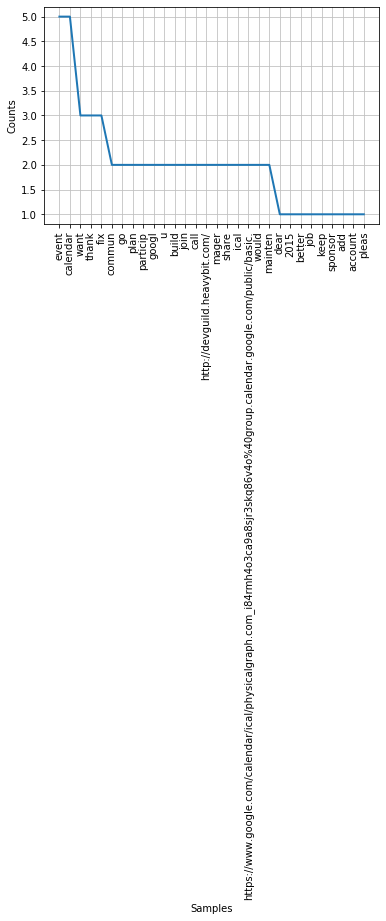

In [41]:
#from textblob import TextBlob
#df['polarity'] = df['Content'].map(lambda text: TextBlob(text).sentiment.polarity)
from nltk.probability import FreqDist
tokenized_word = []
for i in range(14):
    tokenized_word += df['Content'][i]
fdist = FreqDist(tokenized_word)
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [42]:
strdf = df.copy()
for i in range(14):
    strdf['Content'][i] = " ".join(strdf['Content'][i])
print(strdf)

                  User                                            Content
0                mager  dear commun 2015 go better job event plan want...
1             tgauchat  anyon join thursday call locat heavybit indust...
2                mager             tgauchat http://devguild.heavybit.com/
3             tgauchat  mager http://devguild.heavybit.com/ thank penc...
4                 greg                                      post url ical
5            copyninja  ical feed https://www.google.com/calendar/ical...
6                mager  greg https://www.google.com/calendar/ical/phys...
7                twack                    mager st’r go treehack son sign
8                mager                            yep want make big event
9                april                                                   
10  automateeverything  sound fantast look forward hope see north uk t...
11              kelchm            would possibl fix duplic entri calendar
12               april                

In [43]:
from textblob import TextBlob
strdf['Polarity'] = strdf['Content'].map(lambda text: TextBlob(text).sentiment.polarity)
strdf['Polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='Content',
    linecolor='black',
    yTitle='count',
    title='Content Distribution')

In [44]:
df['User'].iplot(
    kind='hist',
    bins=10,
    xTitle='User',
    linecolor='black',
    yTitle='Count',
    title='User Post Frequency')

In [45]:
from wordcloud import WordCloud, STOPWORDS

In [46]:
plt.figure(figsize=(75,50))
wc = WordCloud(background_color="black", 
                stopwords=STOPWORDS,width=2500, height=1800)

<Figure size 5400x3600 with 0 Axes>

(-0.5, 2499.5, 1799.5, -0.5)

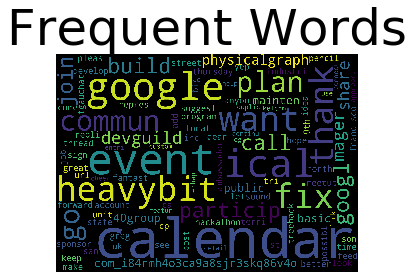

In [47]:
wc.generate(" ".join(strdf.Content))
plt.title("Frequent Words", fontsize=50)
plt.imshow(wc)
plt.axis('off')

In [54]:
all_words = []
for i in range(len(tfdf.index)):
    all_words += (tfdf['Content'][i])
print(all_words)
num_words = len(all_words)
print(num_words)

['dear', 'community', '2015', 'going', 'better', 'job', 'event', 'planning', 'want', 'keep', 'events', 'sponsoring', 'participating', 'add', 'google', 'calendar', 'account', 'google', 'calendar', 'please', 'reply', 'thread', 'suggestions', 'events', 'want', 'us', 'participate', 'also', 'building', 'ambassador', 'program', 'lets', 'represent', 'us', 'hackathons', 'meetups', 'developer', 'events', 'anyone', 'join', 'thursday', 'call', 'location', 'heavybit', 'industries', 'inc', '325', '9th', 'street', 'san', 'francisco', 'ca', '94103', 'united', 'states', 'thanks', 'tgauchat', 'http://devguild.heavybit.com/', 'mager', 'http://devguild.heavybit.com/', 'thanks', 'pencil', 'try', 'join', 'shared', 'calendar', 'great', 'idea', 'cp', 'terry', 'post', 'url', 'ical', 'ical', 'feed', 'https://www.google.com/calendar/ical/physicalgraph.com_i84rmh4o3ca9a8sjr3skq86v4o%40group.calendar.google.com/public/basic.ics', 'greg', 'https://www.google.com/calendar/ical/physicalgraph.com_i84rmh4o3ca9a8sjr3sk

In [55]:
term_freq = {}
for word in all_words:
    if word in term_freq.keys():
        term_freq[word] += 1
    else:
        term_freq[word] = 1
print(term_freq)

{'dear': 1, 'community': 1, '2015': 1, 'going': 2, 'better': 1, 'job': 1, 'event': 2, 'planning': 1, 'want': 3, 'keep': 1, 'events': 3, 'sponsoring': 1, 'participating': 1, 'add': 1, 'google': 2, 'calendar': 5, 'account': 1, 'please': 1, 'reply': 1, 'thread': 1, 'suggestions': 1, 'us': 2, 'participate': 1, 'also': 1, 'building': 2, 'ambassador': 1, 'program': 1, 'lets': 1, 'represent': 1, 'hackathons': 1, 'meetups': 1, 'developer': 1, 'anyone': 1, 'join': 2, 'thursday': 1, 'call': 1, 'location': 1, 'heavybit': 1, 'industries': 1, 'inc': 1, '325': 1, '9th': 1, 'street': 1, 'san': 1, 'francisco': 1, 'ca': 1, '94103': 1, 'united': 1, 'states': 1, 'thanks': 3, 'tgauchat': 1, 'http://devguild.heavybit.com/': 2, 'mager': 2, 'pencil': 1, 'try': 1, 'shared': 1, 'great': 1, 'idea': 1, 'cp': 1, 'terry': 1, 'post': 1, 'url': 1, 'ical': 2, 'feed': 1, 'https://www.google.com/calendar/ical/physicalgraph.com_i84rmh4o3ca9a8sjr3skq86v4o%40group.calendar.google.com/public/basic.ics': 2, 'greg': 1, 'st’r

In [56]:
for word in term_freq.keys():
    term_freq[word] /= num_words
print(term_freq)

{'dear': 0.007633587786259542, 'community': 0.007633587786259542, '2015': 0.007633587786259542, 'going': 0.015267175572519083, 'better': 0.007633587786259542, 'job': 0.007633587786259542, 'event': 0.015267175572519083, 'planning': 0.007633587786259542, 'want': 0.022900763358778626, 'keep': 0.007633587786259542, 'events': 0.022900763358778626, 'sponsoring': 0.007633587786259542, 'participating': 0.007633587786259542, 'add': 0.007633587786259542, 'google': 0.015267175572519083, 'calendar': 0.03816793893129771, 'account': 0.007633587786259542, 'please': 0.007633587786259542, 'reply': 0.007633587786259542, 'thread': 0.007633587786259542, 'suggestions': 0.007633587786259542, 'us': 0.015267175572519083, 'participate': 0.007633587786259542, 'also': 0.007633587786259542, 'building': 0.015267175572519083, 'ambassador': 0.007633587786259542, 'program': 0.007633587786259542, 'lets': 0.007633587786259542, 'represent': 0.007633587786259542, 'hackathons': 0.007633587786259542, 'meetups': 0.007633587